# Bike Sharing Assignment

The Corona epidemic has caused dramatic revenue declines for US bike-sharing company BoomBikes. The company has created a business plan to better grasp the demand for shared bikes following a pandemic in order to bounce back Once the situation gets better, the scheme seeks to meet people's needs and generate notable profits. The corporation will borrow bikes from docks under computer control and bring them back to another pier.

The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Adding required libraries

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn .metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

Reading, understand, clearing data

In [389]:
df = pd.read_csv('data/day.csv') 

Checking first 5 and last 5 rows and row, column count

In [390]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [391]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [392]:
df.shape

(730, 16)

Checking the missing values

In [393]:
print("Missing Values: ", df.isnull().sum())

Missing Values:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [394]:
print("Data Types: ", df.dtypes)

Data Types:  instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Summary of data

In [395]:
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

Removing irrelevant column which can be derived from other column

In [396]:
# instant column is just row number
# casual and registered sum is cnt, these are dependent variable, seperate count not required
# dteday not required for analysis as for month and year in this case we already have column

irrelevant_columns = ['instant', 'casual', 'registered', 'dteday']

In [397]:
# dropping the irrelevant_columns
df = df.drop(irrelevant_columns, axis=1)

Checking data after column drop

In [398]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Renaming column name for better reading and understanding

In [399]:
df.rename(columns={'yr':'year', 'mnth':'month', 'cnt':'total_count', 'hum':'humidity'}, inplace=True)

In [400]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [401]:
# Mapping 'season' and 'weathersit' to categorical labels
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weathersit_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
}

In [402]:
df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

In [403]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [404]:
# Derived variable
# 1. Temprature difference
df['temp_diff'] = df['temp'] - df['atemp']

In [405]:
# wheather a day is weekend
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [406]:
# Normalised demand
df['normalized_count'] = df['total_count'] / df['total_count'].max()

In [407]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count,temp_diff,is_weekend,normalized_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985,-4.070403,1,0.113036
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801,-2.784352,1,0.091921
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,-1.419326,0,0.154808
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,-2.406100,0,0.179252
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,-2.158263,0,0.183613


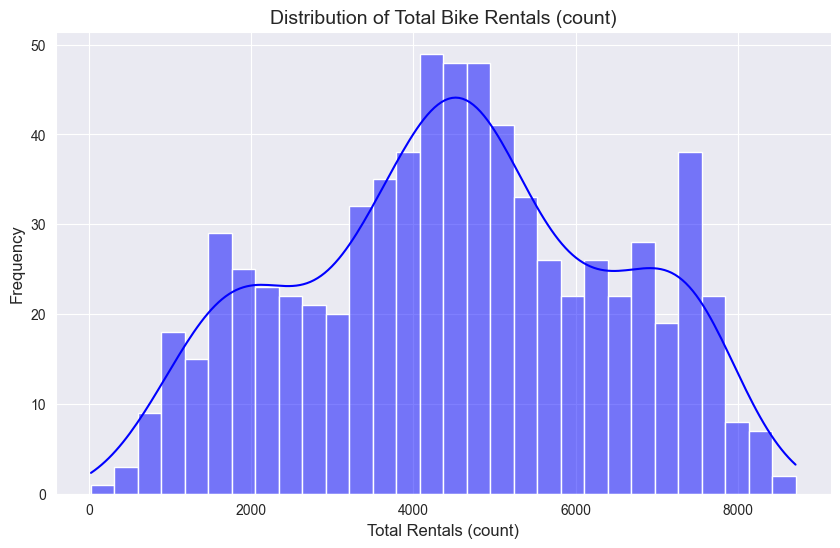

In [408]:
# Distribution of total count -> target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['total_count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (count)', fontsize=14)
plt.xlabel('Total Rentals (count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

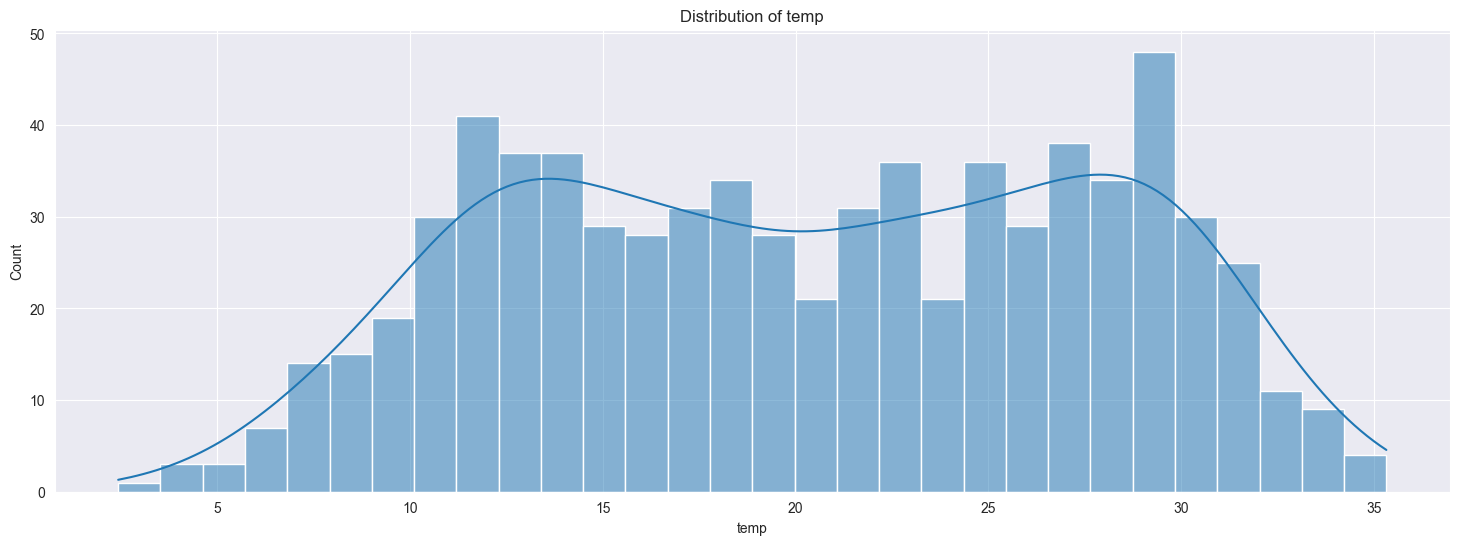

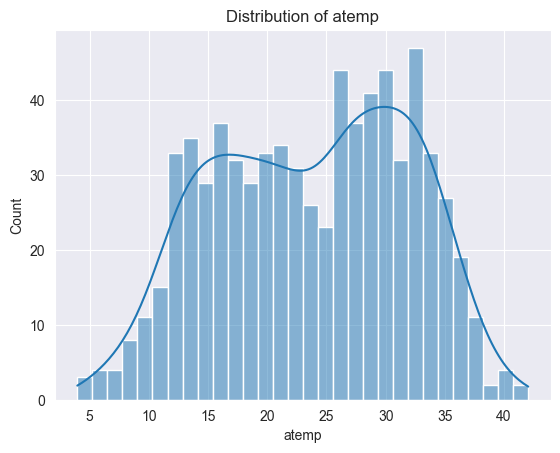

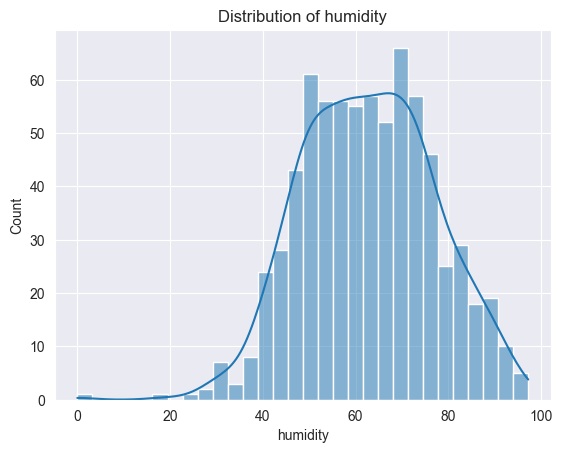

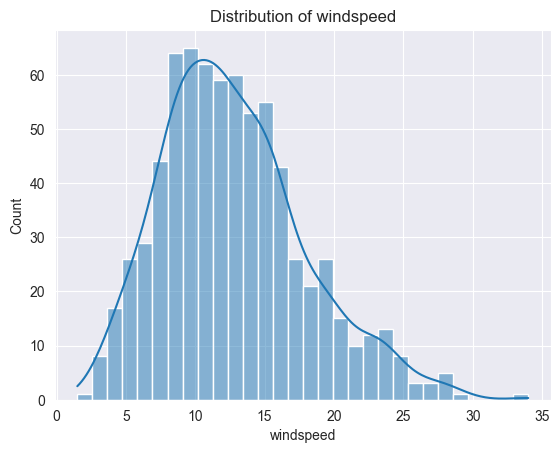

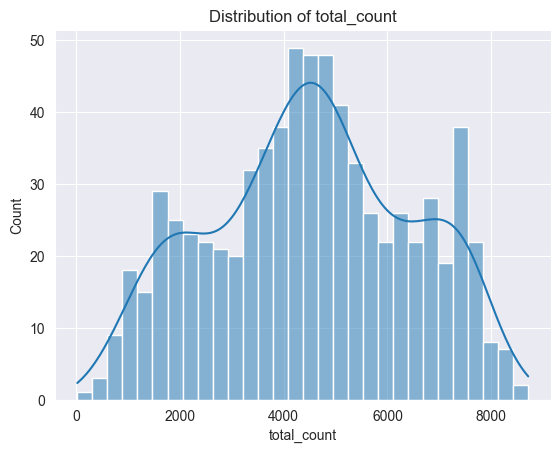

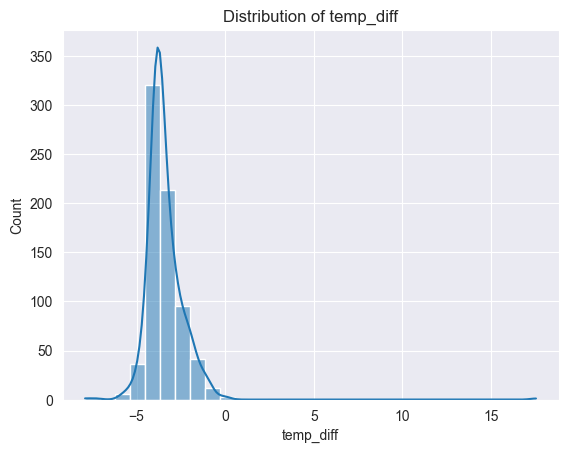

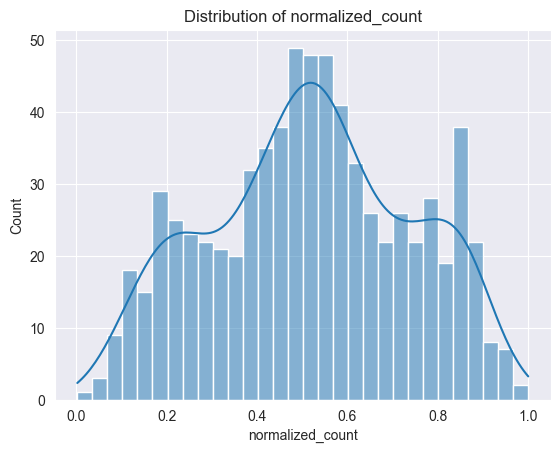

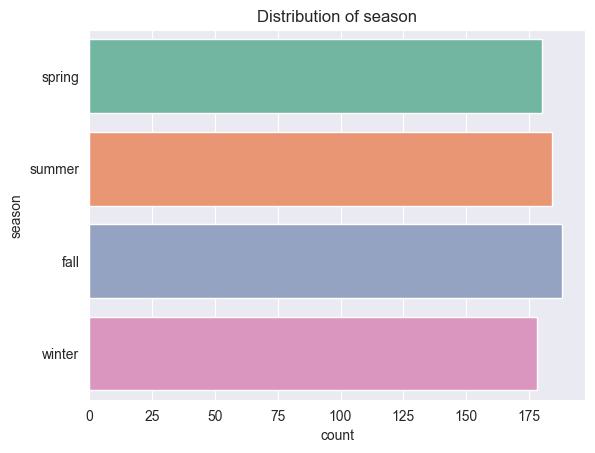

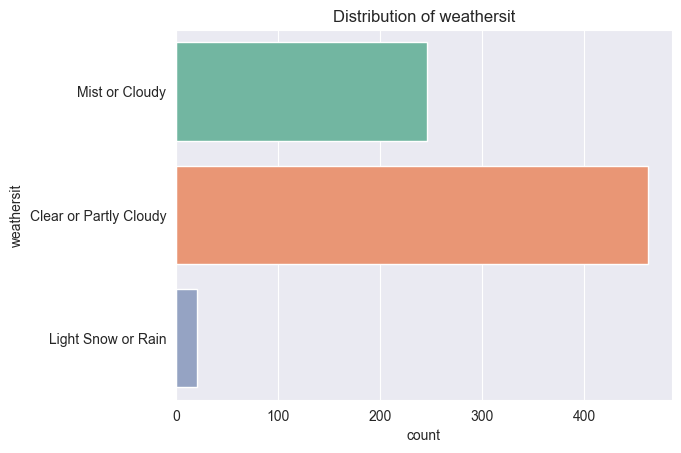

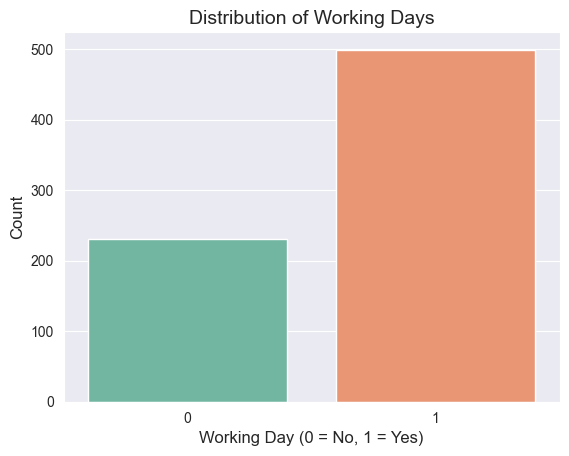

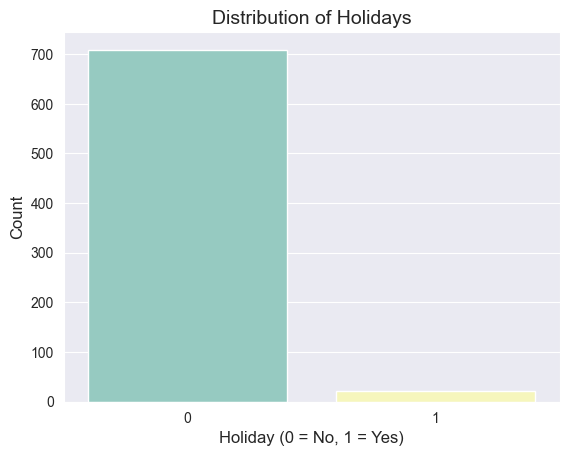

In [409]:
# Univariate analysis
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'total_count', 'temp_diff', 'normalized_count']
plt.figure(figsize=(18, 6))

for var in numerical_vars:
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.show()
    
categorical_vars = ['season', 'weathersit']

for var in categorical_vars:
    sns.countplot(df[var], palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.show()
    
sns.countplot(x='workingday', data=df, palette='Set2')
plt.title('Distribution of Working Days', fontsize=14)
plt.xlabel('Working Day (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

sns.countplot(x='holiday', data=df, palette='Set3')
plt.title('Distribution of Holidays', fontsize=14)
plt.xlabel('Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
  

In [410]:
df[numerical_vars].describe()

,temp,atemp,humidity,windspeed,total_count,temp_diff,normalized_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,-3.407062,0.517329
std,7.506729,8.150308,14.237589,5.195841,1936.011647,1.195945,0.222173
min,2.424346,3.953480,0.000000,1.500244,22.000000,-7.903550,0.002525
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,-3.942097,0.363754
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,-3.659499,0.521976
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,-2.999787,0.684645
max,35.328347,42.044800,97.250000,34.000021,8714.000000,17.536653,1.000000


1. Max frequency are around temperature 13 to 26 degree, windspeed 9 to 15 and humidity 52 to 72
2. High Count is on Working day
3. High Count is  on mist or cloudy and clear and partial cloudy days

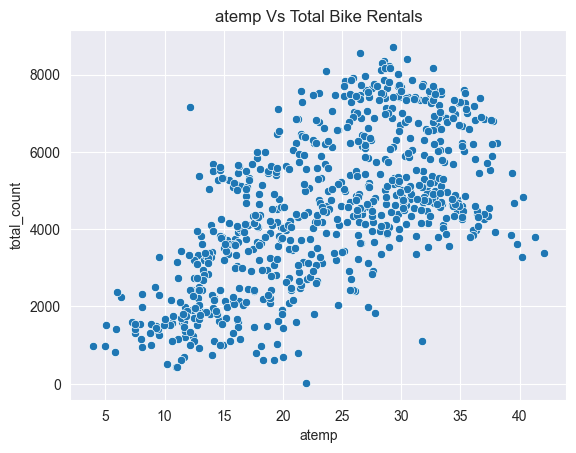

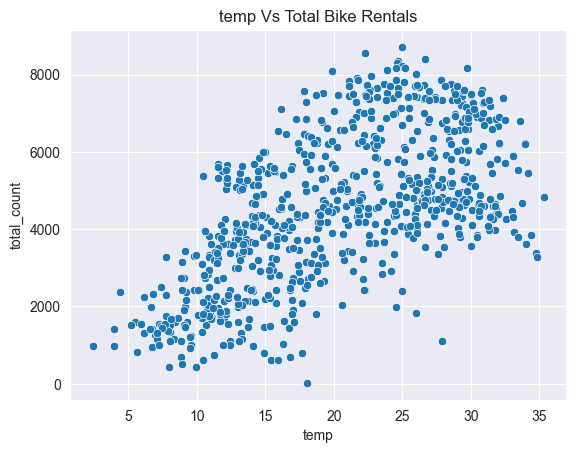

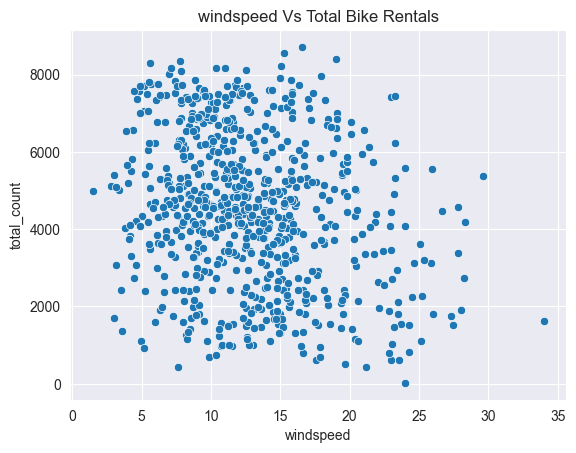

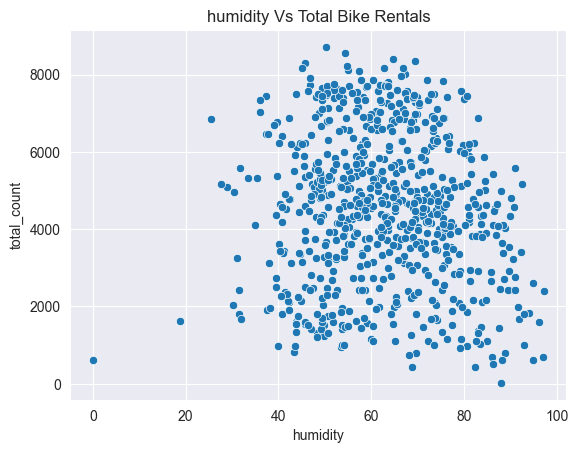

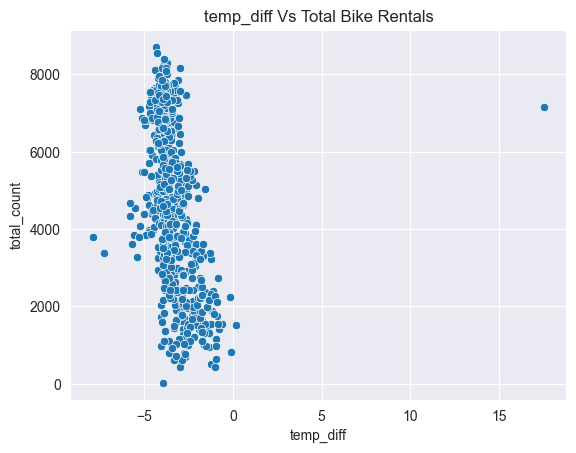

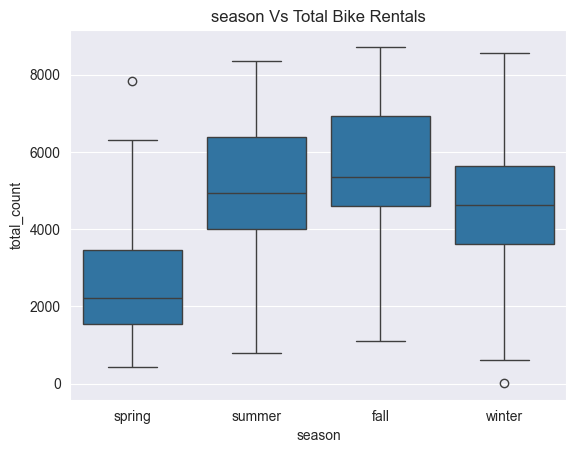

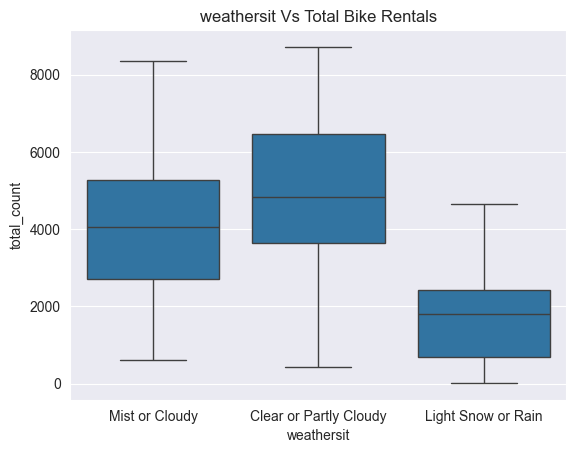

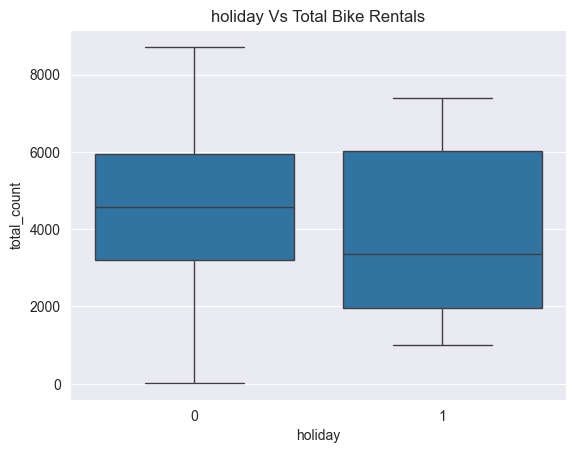

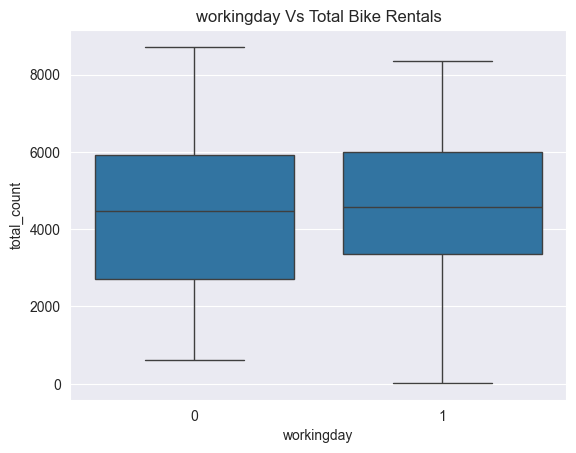

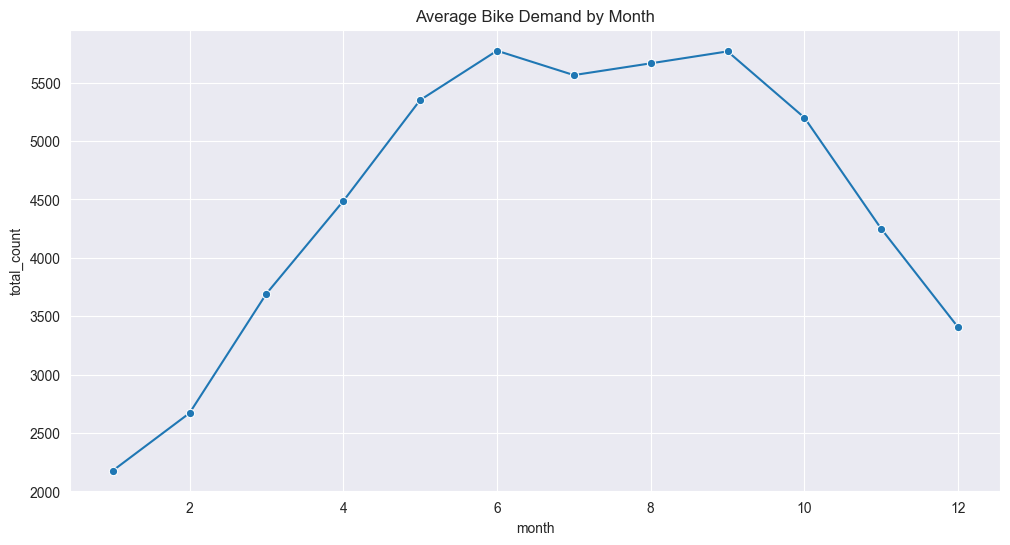

In [411]:
# Bivariate Analysis
# Bar plots for interaction effects, e.g., season and weathersit.

numerical_vars = ['atemp', 'temp', 'windspeed', 'humidity', 'temp_diff']

for var in numerical_vars:
    sns.scatterplot(x=var, y='total_count', data=df)
    plt.title(f'{var} Vs Total Bike Rentals')
    plt.show()
    
categorical_vars = ['season', 'weathersit', 'holiday', 'workingday']

for var in categorical_vars:
    sns.boxplot(x=var, y='total_count', data=df)
    plt.title(f'{var} Vs Total Bike Rentals')
    plt.show()

# Plot of bike demand by month and season
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_count', data=df, ci=None, marker='o', estimator='mean')
plt.title("Average Bike Demand by Month")
plt.show()

1. Temp and Atemp follow same trend showing similarity
2. windspeed between 5-20 show high rental count
3. humidity between 40-80 show high rental count
4. High rental during summer and fall season
5. High rental during mist, clear, partial cloudy
6. High Bike demands are during the month of 4 to 11 (April to November)

Checking for outliers

In [412]:
# Handle outliers for temp, atemp, humidity, windspeed
# atemp
# Handle outliers using IQR
Q1 = df['atemp'].quantile(0.25)
Q3 = df['atemp'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['atemp'] >= lower_bound) & (df['atemp'] <= upper_bound)]

#temp
# Handle outliers using IQR
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['temp'] >= lower_bound) & (df['temp'] <= upper_bound)]

# humidity
# Handle outliers using IQR
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['humidity'] >= lower_bound) & (df['humidity'] <= upper_bound)]

# windspeed
# Handle outliers using IQR
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['windspeed'] >= lower_bound) & (df['windspeed'] <= upper_bound)]


### Plot after outliers removals for temp, atemp, humidity and windspeed for validation

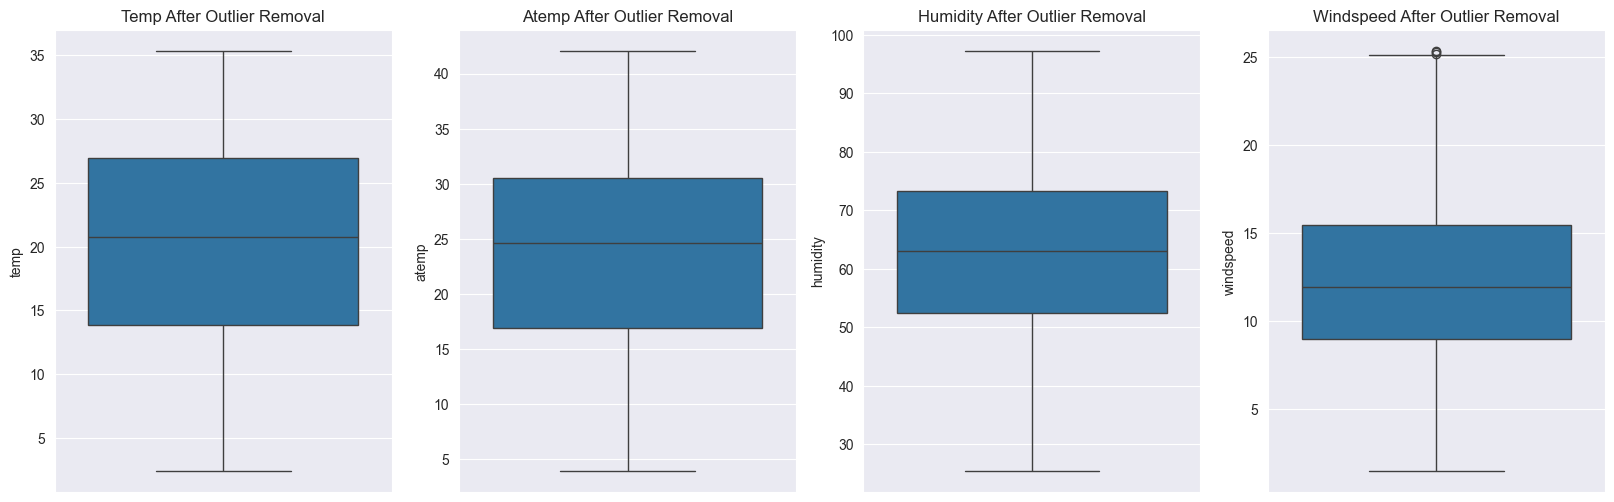

In [413]:
# Boxplots before outlier removal
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(y=df['temp'], ax=axes[0])
sns.boxplot(y=df['atemp'], ax=axes[1])
sns.boxplot(y=df['humidity'], ax=axes[2])
sns.boxplot(y=df['windspeed'], ax=axes[3])
axes[0].set_title('Temp After Outlier Removal')
axes[1].set_title('Atemp After Outlier Removal')
axes[2].set_title('Humidity After Outlier Removal')
axes[3].set_title('Windspeed After Outlier Removal')
plt.show()

In [414]:
df.shape

(716, 15)

In [415]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count,temp_diff,is_weekend,normalized_count
0,spring,0,1,0,6,0,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985,-4.070403,1,0.113036
1,spring,0,1,0,0,0,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801,-2.784352,1,0.091921
2,spring,0,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,-1.419326,0,0.154808
3,spring,0,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,-2.406100,0,0.179252
4,spring,0,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,-2.158263,0,0.183613


In [416]:
month_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dateday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

In [417]:
df['month'] = df['month'].map(month_labels)
df['weekday'] = df['weekday'].map(weekday_labels)

In [418]:
# Create dummy variables for 'season' and 'weathersit'
df = pd.get_dummies(df, columns=['season', 'weathersit', 'month', 'weekday'], drop_first=True)
print(df.head())

   year  holiday  workingday       temp     atemp  humidity  windspeed  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   

   total_count  temp_diff  is_weekend  ...  month_may  month_november  \
0          985  -4.070403           1  ...      False           False   
1          801  -2.784352           1  ...      False           False   
2         1349  -1.419326           0  ...      False           False   
3         1562  -2.406100           0  ...      False           False   
4         1600  -2.158263           0  ...      False           False   

   month_october  month_september  weekday_Monday  weekday_Saturday  \
0          False            False           F

In [419]:
df.shape

(716, 33)

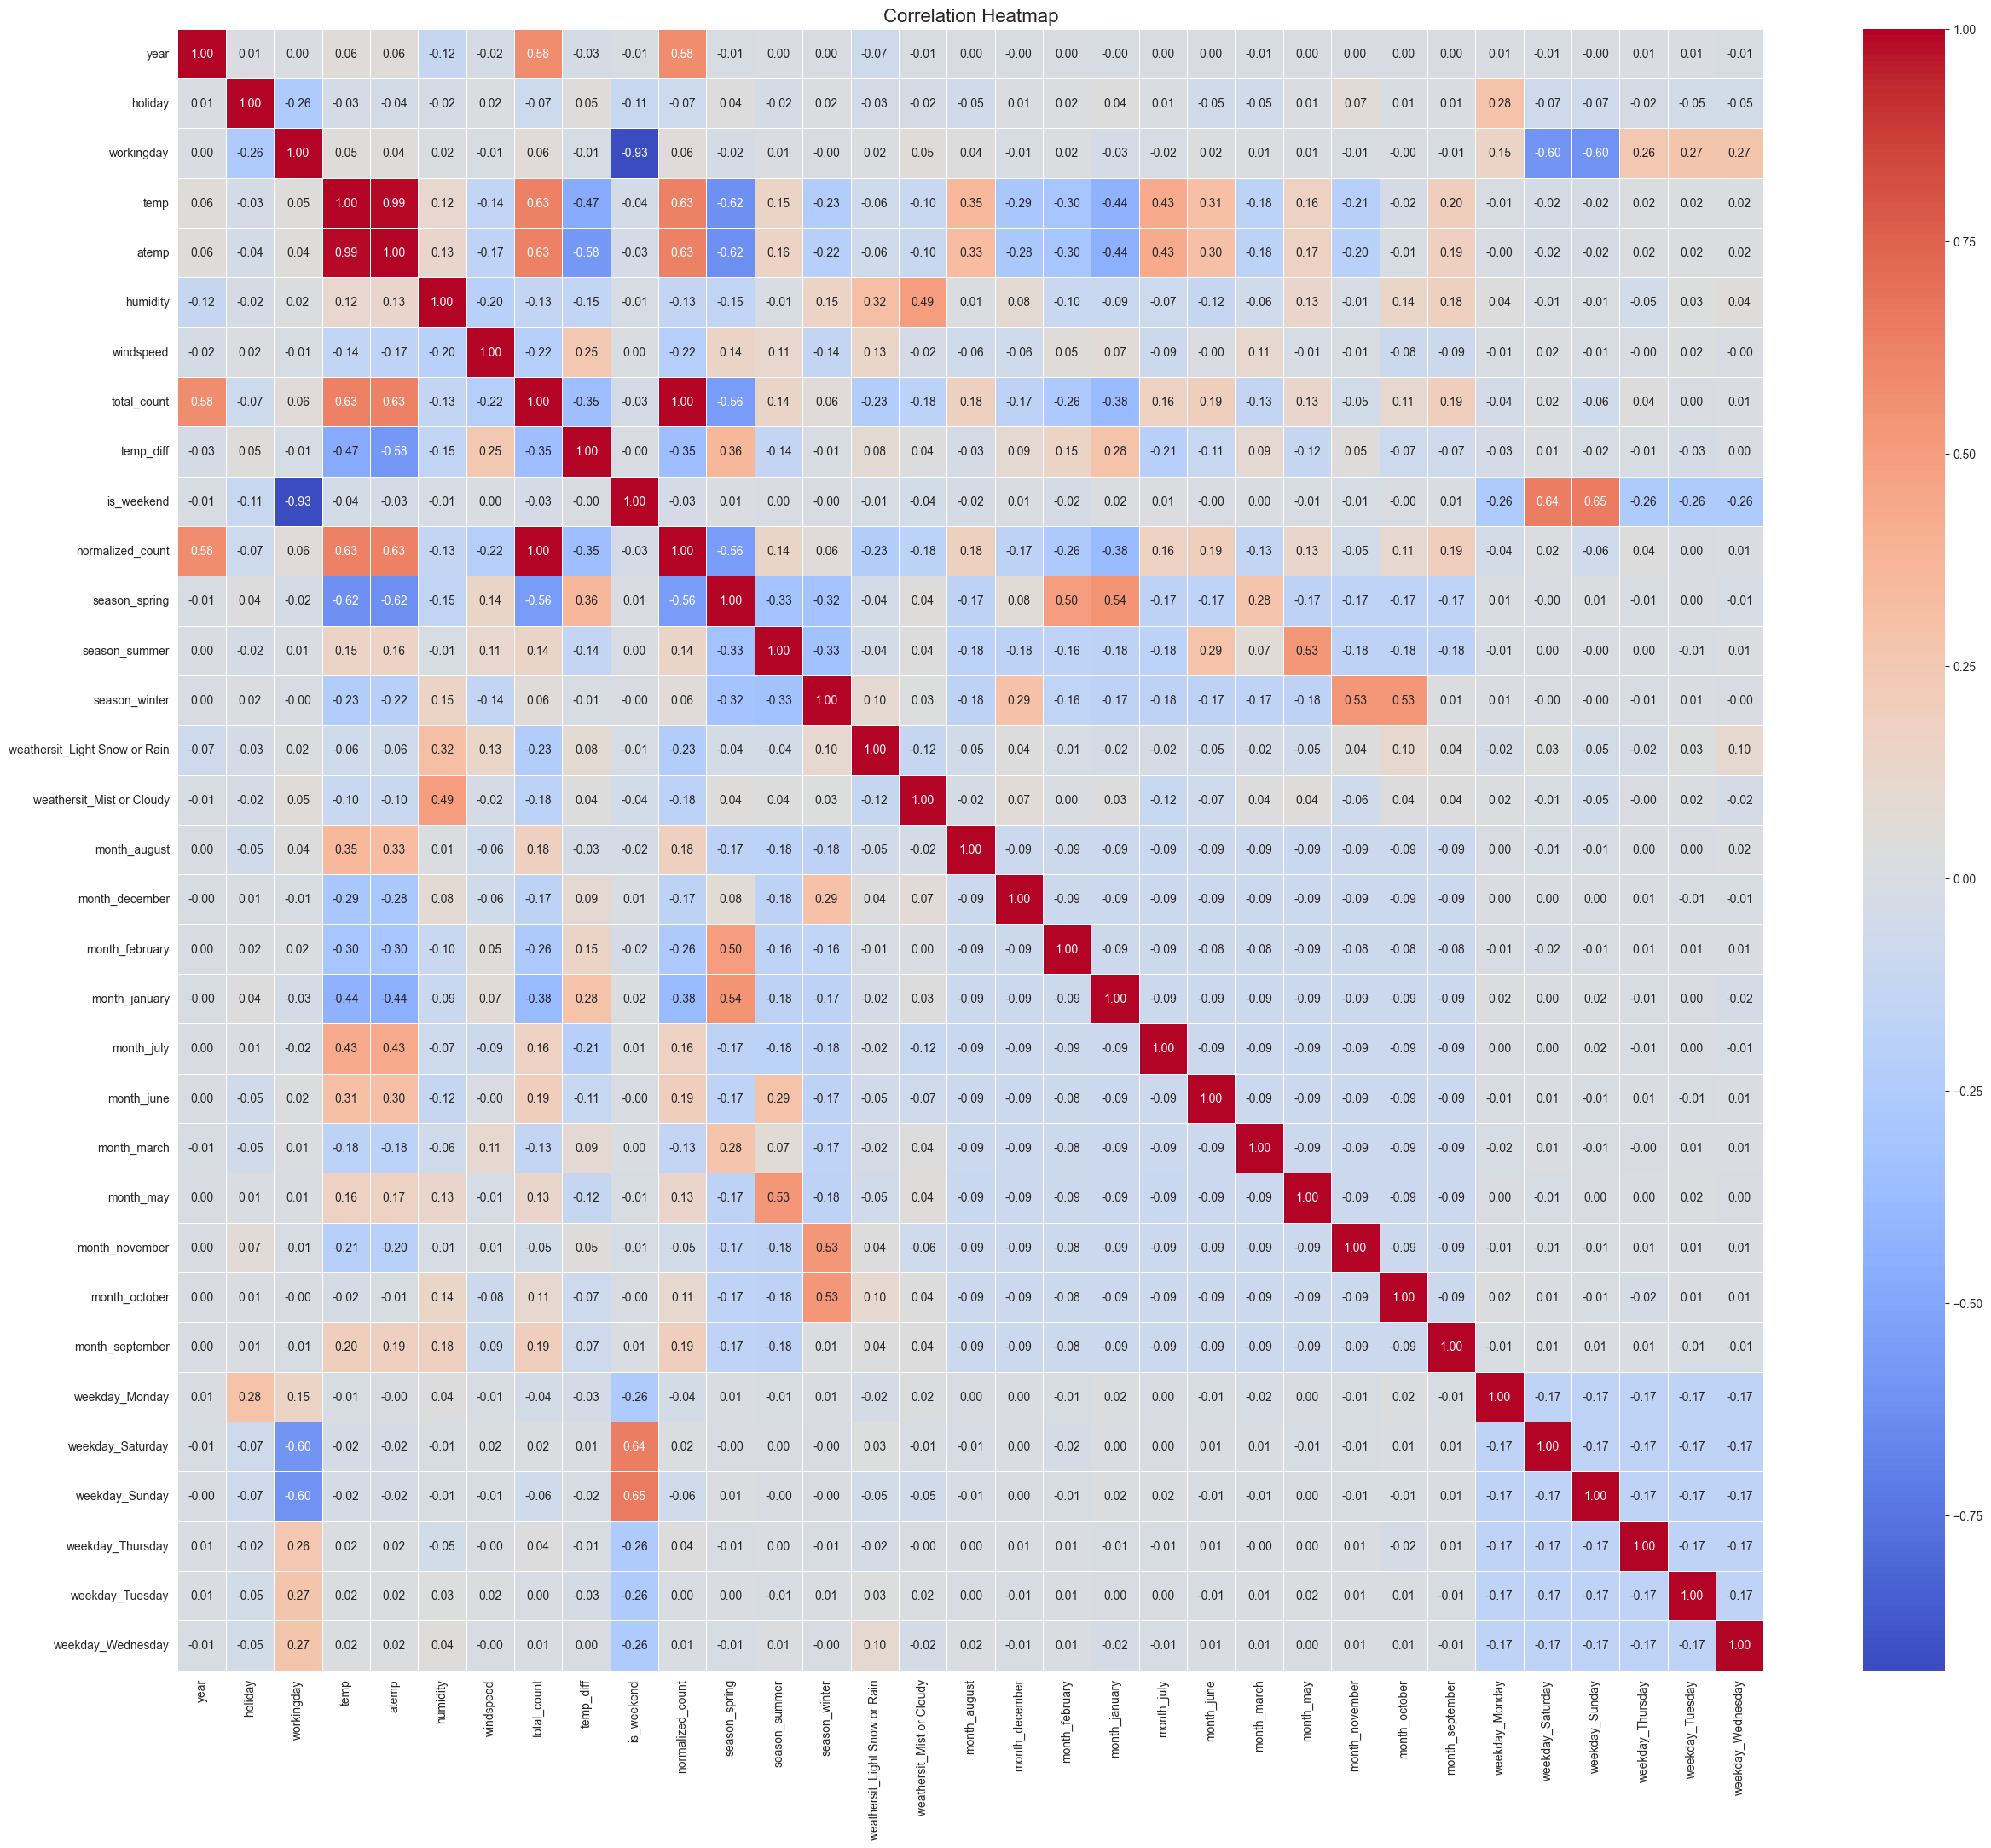

In [420]:
# Multivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Strong positive relation with target variable (total_count):
1. temp
2. year
3. season_winter
4. season_summer

Strong negative relation with target variable (total_count):
1. humidity
2. windspeed
3. weathersit_Light Snow or Rain

weak or negligible co-relation:
1. holiday
2. weekday
3. is_weekend
4. temp_diff

multi-collinearity to address:
1. temp and atemp nearly identical, we can drop 1 variable
2. normalised_count is redundant variable derived from total_count - we will remove this variable
3. season_spring, season_summer, season_winter these are dummy variable for season, multi-collinearity is expected and accepted because one is dropped

In [421]:
df.shape

(716, 33)

In [422]:
# correlation between ```temp``` and ```atemp```
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991732
atemp,0.991732,1.000000


- Since, the correlation between temp and atemp is almost 1, we can drop one of them
- atemp represents adjusted temperature which is an indicator of how hot it actually feels like which is a compound measure of temperature,humidity and windspeed.
- atemp might cause bias in data as it's a compound variable, instead we could use temp , humidity , windspeed. 
- So dropping atemp variable

Preparing data for machine learning:

In [423]:
df1 = df.drop(columns=['atemp', 'normalized_count', 'is_weekend', 'holiday', 'temp_diff'])

In [424]:
df1.shape

(716, 28)

Splitting data into train and test data

In [438]:
# random state as 42?
# The number 42 has no special statistical meaning—it is often chosen as a convention in the programming and data science community
df_train,df_test = train_test_split(df1, train_size=0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)

(501, 28)
(215, 28)


Rescaling on numeric variables

In [439]:
# Rescaling on numeric variables: Doing Min-Max scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
num_vars = ['temp','humidity','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,workingday,temp,humidity,windspeed,total_count,season_spring,season_summer,season_winter,weathersit_Light Snow or Rain,...,month_may,month_november,month_october,month_september,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
28,0,0,0.171197,0.571704,0.345706,1098,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
43,0,0,0.320723,0.292234,0.670454,1589,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
42,0,0,0.203567,0.417017,0.508763,1472,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
76,0,1,0.599187,0.389767,0.586494,3239,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172,0,1,0.840090,0.651888,0.421320,4507,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Building Model

In [440]:
y_train = df_train.pop('total_count')
X_train = df_train

## 1st Model

In [441]:
bool_columns = ['season_spring', 'season_summer', 'season_winter', 
                'weathersit_Light Snow or Rain', 'weathersit_Mist or Cloudy', 'month_august', 'month_december', 'month_february',
                'month_january', 'month_july', 'month_june', 'month_march', 'month_may', 'month_november', 'month_october', 'month_september',
                'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']
X_train[bool_columns] = X_train[bool_columns].astype(int)

In [442]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [443]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,year
22,1,True,weekday_Saturday
20,1,True,month_september
18,1,True,month_november
14,1,True,month_july
11,1,True,month_december
9,1,True,weathersit_Mist or Cloudy
8,1,True,weathersit_Light Snow or Rain
13,1,True,month_january
5,1,True,season_spring


In [444]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['year', 'weekday_Saturday', 'month_september', 'month_november',
       'month_july', 'month_december', 'weathersit_Mist or Cloudy',
       'weathersit_Light Snow or Rain', 'month_january', 'season_spring',
       'windspeed', 'season_winter', 'humidity', 'temp', 'workingday'],
      dtype=object)

## Manual Elimination

In [445]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [446]:
feature_1 = selected_features
ols_fit(y_train,X_train[feature_1])

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          6.04e-185
Time:                        10:38:12   Log-Likelihood:                -4034.4
No. Observations:                 501   AIC:                             8101.
Df Residuals:                     485   BIC:                             8168.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Model 2 with removing month_january high p-value

In [447]:
del_feature = 'month_january'
selected_features = selected_features[selected_features!=del_feature]
print(selected_features)

['year' 'weekday_Saturday' 'month_september' 'month_november' 'month_july'
 'month_december' 'weathersit_Mist or Cloudy'
 'weathersit_Light Snow or Rain' 'season_spring' 'windspeed'
 'season_winter' 'humidity' 'temp' 'workingday']


In [448]:
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.21e-185
Time:                        10:38:22   Log-Likelihood:                -4036.1
No. Observations:                 501   AIC:                             8102.
Df Residuals:                     486   BIC:                             8166.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Checking VIF

In [449]:
vif(X_train[selected_features])

                            index        vif
0                           const  53.290158
13                           temp   3.461365
9                   season_spring   2.754852
11                  season_winter   2.247627
12                       humidity   2.083254
4                  month_november   1.711401
7       weathersit_Mist or Cloudy   1.691263
14                     workingday   1.611236
2                weekday_Saturday   1.588008
8   weathersit_Light Snow or Rain   1.401125
5                      month_july   1.390290
6                  month_december   1.323388
10                      windspeed   1.200784
3                 month_september   1.130895
1                            year   1.034402


All selected variable VIF is below 5

## Model 3 with removing month_december because information might also be in season_winter

In [450]:
del_feature = 'month_december'
selected_features = selected_features[selected_features!=del_feature]
print(selected_features)

['year' 'weekday_Saturday' 'month_september' 'month_november' 'month_july'
 'weathersit_Mist or Cloudy' 'weathersit_Light Snow or Rain'
 'season_spring' 'windspeed' 'season_winter' 'humidity' 'temp'
 'workingday']


In [451]:
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     196.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.53e-184
Time:                        10:40:39   Log-Likelihood:                -4042.2
No. Observations:                 501   AIC:                             8112.
Df Residuals:                     487   BIC:                             8171.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Model 4 with removing month_november because information might also be in season_winter

In [452]:
del_feature = 'month_november'
selected_features = selected_features[selected_features!=del_feature]
print(selected_features)

['year' 'weekday_Saturday' 'month_september' 'month_july'
 'weathersit_Mist or Cloudy' 'weathersit_Light Snow or Rain'
 'season_spring' 'windspeed' 'season_winter' 'humidity' 'temp'
 'workingday']


In [453]:
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.96e-183
Time:                        10:41:09   Log-Likelihood:                -4047.9
No. Observations:                 501   AIC:                             8122.
Df Residuals:                     488   BIC:                             8177.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Verifying for MultiCollinearity

In [454]:
vif(X_train[selected_features])

                            index        vif
0                           const  51.193224
11                           temp   3.212741
7                   season_spring   2.689141
10                       humidity   2.075183
9                   season_winter   1.745125
5       weathersit_Mist or Cloudy   1.684355
12                     workingday   1.610418
2                weekday_Saturday   1.586517
6   weathersit_Light Snow or Rain   1.392830
4                      month_july   1.379265
8                       windspeed   1.187396
3                 month_september   1.119548
1                            year   1.030037


VIF < 5 for selected features. No significant multi-collinearity observed. Indicating comparison of R-squared and adjusted R-squared.

## Final Model

In [455]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.96e-183
Time:                        10:42:55   Log-Likelihood:                -4047.9
No. Observations:                 501   AIC:                             8122.
Df Residuals:                     488   BIC:                             8177.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Residual Analysis

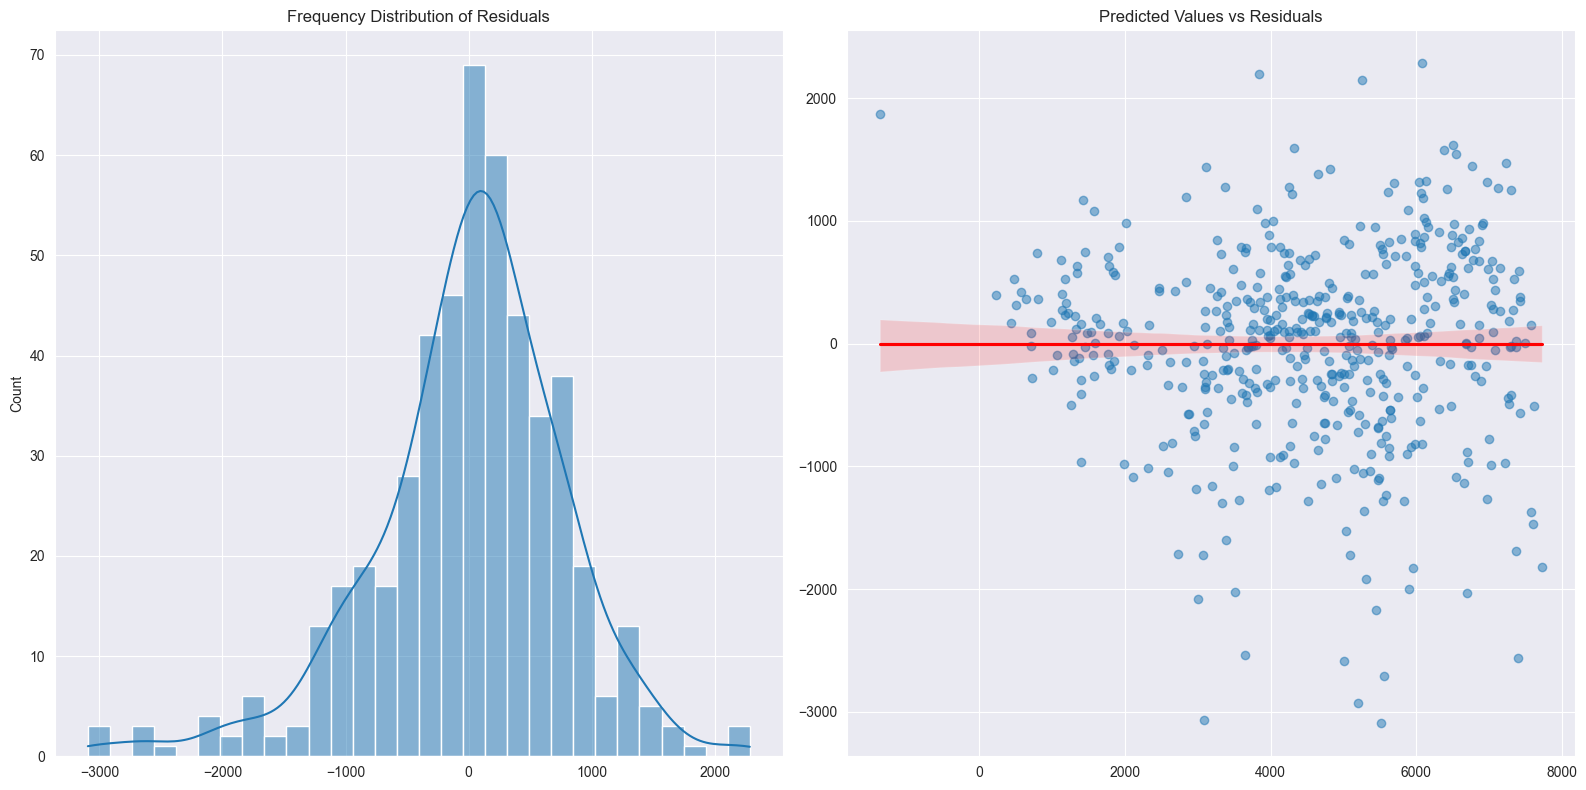

In [456]:
# Residual Analysis of Trained Data
# Adding constant to X_train for statsmodels
X_train_sm = sm.add_constant(X_train[selected_features])

# Predict on training data
y_train_pred = final_model.predict(X_train_sm)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Residual Distribution Plot
ax[0].set_title('Frequency Distribution of Residuals')
sns.histplot(y_train - y_train_pred, bins=30, kde=True, ax=ax[0]) 

# Predicted vs Residuals Plot
ax[1].set_title('Predicted Values vs Residuals')
sns.regplot(x=y_train_pred, y=y_train - y_train_pred, ax=ax[1], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# Improve layout
plt.tight_layout()
plt.show()

In [457]:
# Mean of Residuals
(y_train-y_train_pred).mean()

np.float64(5.582227959983542e-12)

From above graph following information can be derived:

1. Error terms are normally distributed with mean 0
2. Variance of Errors doesn't follow any trends
3. Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend or pattern, hence Homoscedasticity assumption is satisfied


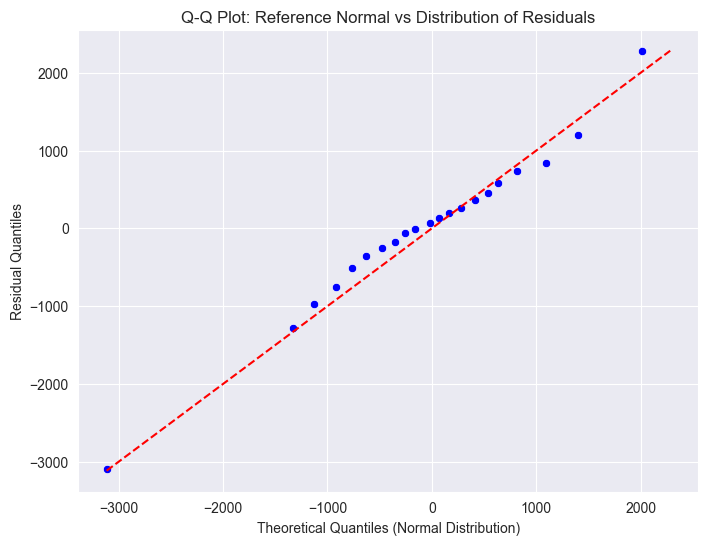

In [458]:
residuals = y_train - y_train_pred

# Computing mean and standard deviation of residuals
mean = residuals.mean()
std = residuals.std()

# Generating a reference normal distribution
ref_normal = np.random.normal(mean, std, residuals.shape[0])

# Computing percentiles
percs = np.linspace(0, 100, 21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(residuals, percs)

# Creating the Q-Q plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=qn_ref_normal, y=qn_residual, marker="o", color='blue')

# Adding 45-degree reference line
x = np.linspace(min(qn_ref_normal.min(), qn_residual.min()), 
                max(qn_ref_normal.max(), qn_residual.max()), 100)
plt.plot(x, x, color="red", linestyle="--")

# Titles and labels
plt.title('Q-Q Plot: Reference Normal vs Distribution of Residuals')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Residual Quantiles')
plt.grid(True)

# Showing plot
plt.show()

This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. 
Extrapolated points show significant predict inaccuracy

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

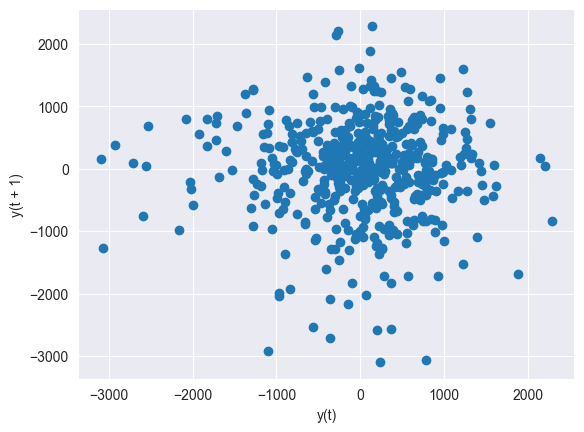

In [459]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

Lagplot of residuals shows no trend, shows the error terms have constant variance

### It shows the assumption fo linear regression are satisfied by the model

## Prediction and evaluation on the test set

In [460]:
# Splitting data into y_test and X_test
y_test = df_test.pop('total_count')
X_test = df_test
X_test[bool_columns] = X_test[bool_columns].astype(int)
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

Adding constant

In [461]:
X_test = sm.add_constant(X_test)


Final model on test data

In [462]:
y_test_pred = final_model.predict(X_test)

## Model Evaluation

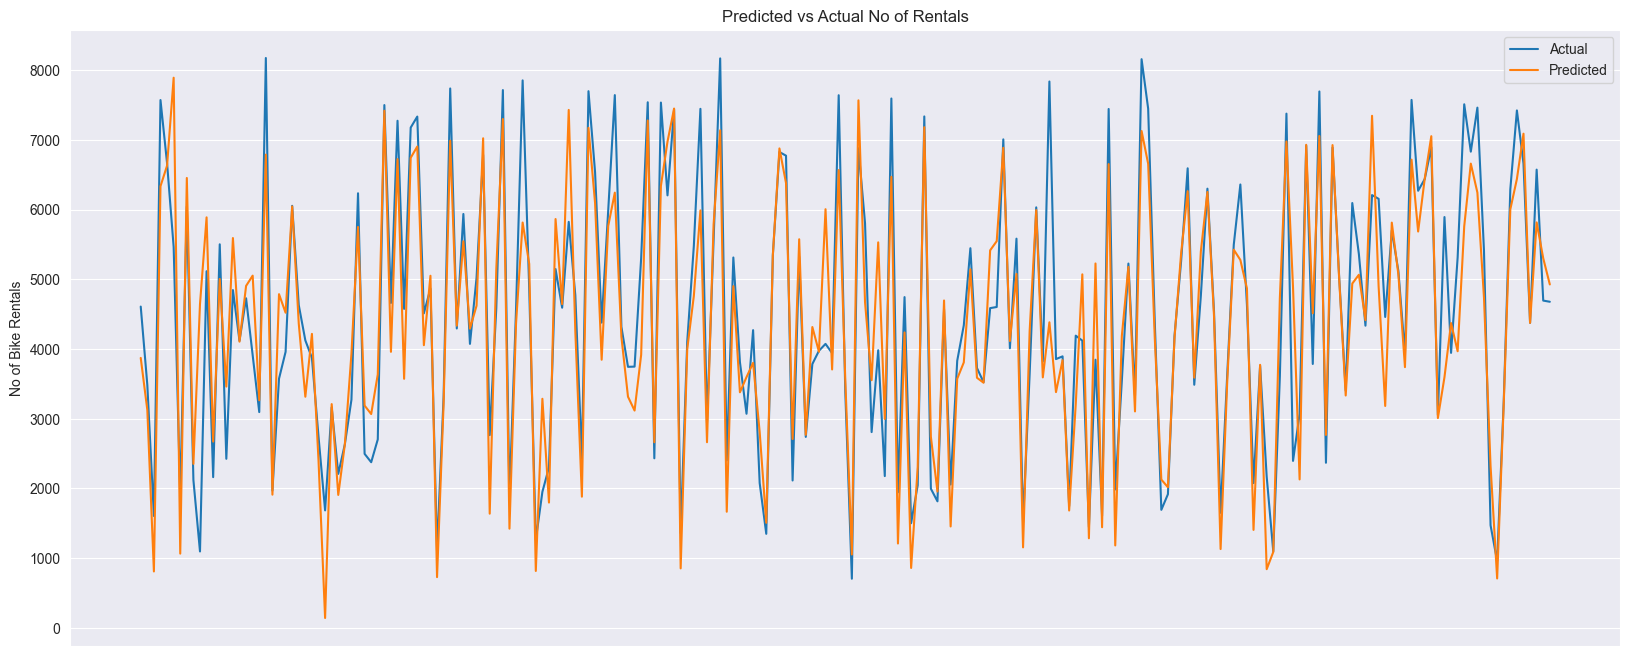

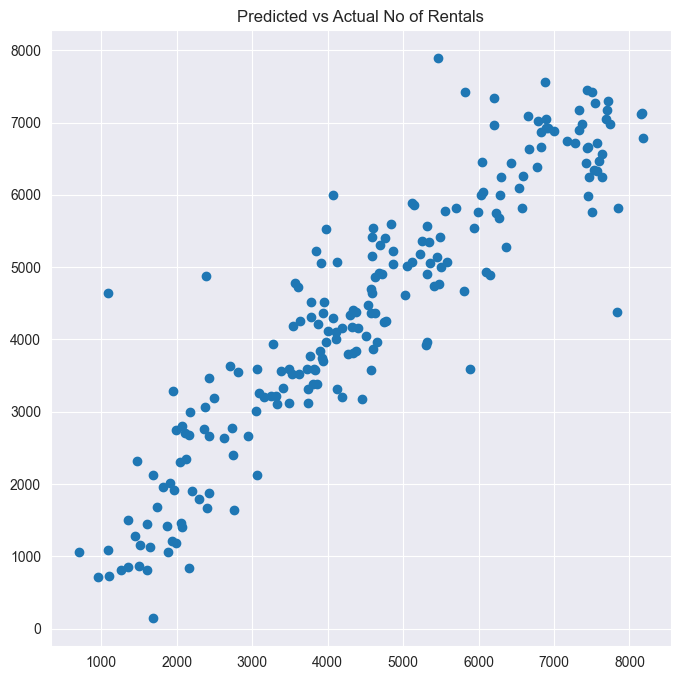

In [463]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

Predicted vs observed value plots shows that the model is reasonably accurate

In [465]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.83
Mean Squared Error 645515.516


## Model Stability

In [466]:
# R-square using cross validation
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.88385654, 0.83274214, 0.70522922, 0.84382946, 0.84925518,
       0.77580041, 0.71893696, 0.79966465, 0.89692803, 0.84555577])

In [467]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.12)


In [468]:
selected_features

array(['year', 'weekday_Saturday', 'month_september', 'month_july',
       'weathersit_Mist or Cloudy', 'weathersit_Light Snow or Rain',
       'season_spring', 'windspeed', 'season_winter', 'humidity', 'temp',
       'workingday'], dtype=object)

## Top Features

In [469]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','humidity']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','humidity']]), columns=['temp','windspeed','humidity'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2383.95922748]


,MLR Coefficients
temp,3964.671549
year,1949.536576
month_september,680.367091
weekday_Saturday,453.329338
workingday,452.528141
season_winter,410.991752
weathersit_Mist or Cloudy,-437.245016
month_july,-625.468359
windspeed,-832.016789
humidity,-1156.057131


Upon standardized the values of predictor variables, the above shows that the top features influencing demand are temp, followed by year and humidity

In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by xxx, when all other modelled parameters are held unchanged.

In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is xxx,, when all other modelled parameters are held unchanged.